In [ ]:
#Importing all the libraries we will be using in our project
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import numpy as np

In [ ]:
# Load the CSV file into a pandas DataFrame
data = pd.read_csv("/content/meiscatt(1).csv")
data_frame = pd.DataFrame(data) #Converted dataset in pandas dataframe
data_frame.head()

,Angle theta,Perpendicular,Parallel,Unpolarised
0,0.0,21766979.14,21766979.14,21766979.14
1,0.1,21599959.33,21600773.23,21600366.28
2,0.2,21105197.77,21108390.91,21106794.34
3,0.3,20301260.58,20308215.78,20304738.18
4,0.4,19218019.85,19229831.64,19223925.74


In [ ]:
# Checking is there any value is null or not.
missing_values_per_column = data_frame.isnull().sum()
missing_values_per_column

Angle theta      0
Perpendicular    0
Parallel         0
Unpolarised      0
dtype: int64

In [ ]:
#Splitting the data into training and testing in 80:20 ratio.
X = data_frame[['Angle theta']]  # Features
X1=X.copy()
y1 = data_frame['Parallel']
y2 = data_frame['Perpendicular']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X1, y2, test_size=0.2, random_state=42)

In [ ]:
#For parallel
print(X_train1.head())
print('---------------------------------------------')
print(X_test1.head())
print('---------------------------------------------')
print(y_train1.head())
print('---------------------------------------------')
print(y_test1.head())

      Angle theta
1572        157.2
1567        156.7
1310        131.0
567          56.7
175          17.5
---------------------------------------------
      Angle theta
973          97.3
1747        174.7
785          78.5
162          16.2
1272        127.2
---------------------------------------------
1572      389.491134
1567     1004.948362
1310        8.936590
567      1604.623375
175     26634.759600
Name: Parallel, dtype: float64
---------------------------------------------
973        66.547606
1747      710.582624
785       277.024257
162     16043.849720
1272       16.100136
Name: Parallel, dtype: float64


In [ ]:
#For perpendicular
print(X_train2.head())
print('---------------------------------------------')
print(X_test2.head())
print('---------------------------------------------')
print(y_train2.head())
print('---------------------------------------------')
print(y_test2.head())

      Angle theta
1572        157.2
1567        156.7
1310        131.0
567          56.7
175          17.5
---------------------------------------------
      Angle theta
973          97.3
1747        174.7
785          78.5
162          16.2
1272        127.2
---------------------------------------------
1572      938.026051
1567      435.580763
1310       34.009327
567      1443.572311
175     24855.245300
Name: Perpendicular, dtype: float64
---------------------------------------------
973       122.451688
1747      887.020624
785        14.806341
162     16999.983180
1272      561.426920
Name: Perpendicular, dtype: float64


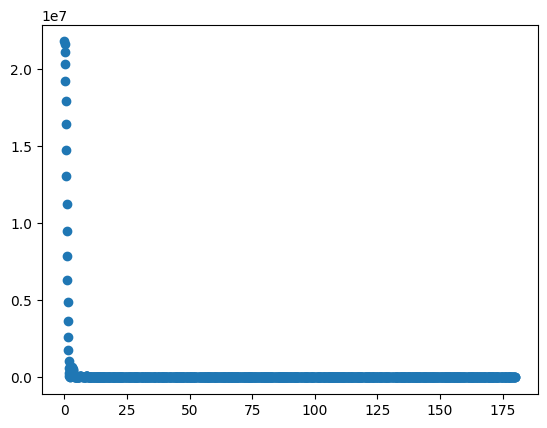

In [ ]:
plt.scatter(X_train1,y_train1)


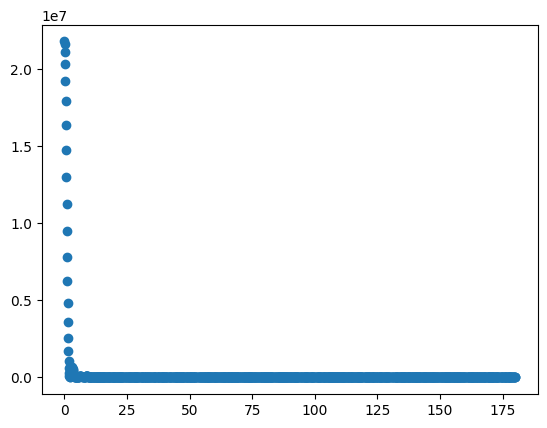

In [ ]:
plt.scatter(X_train2,y_train2)


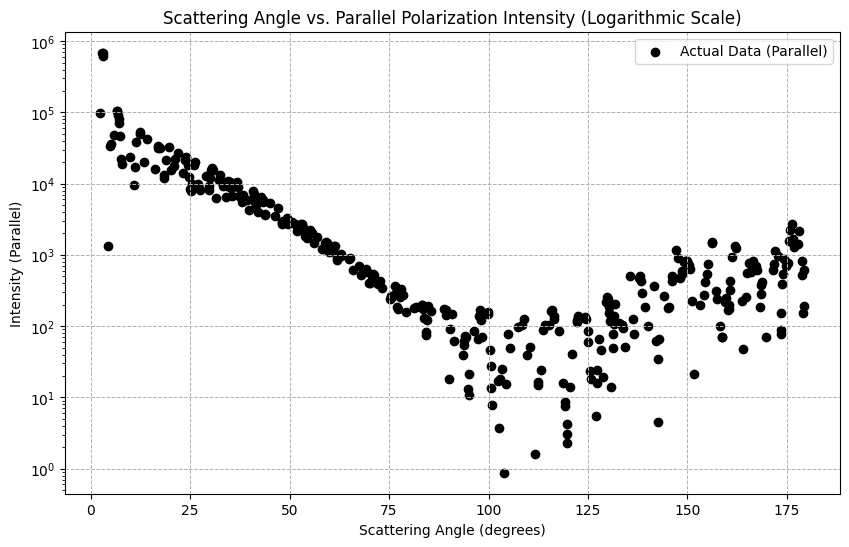

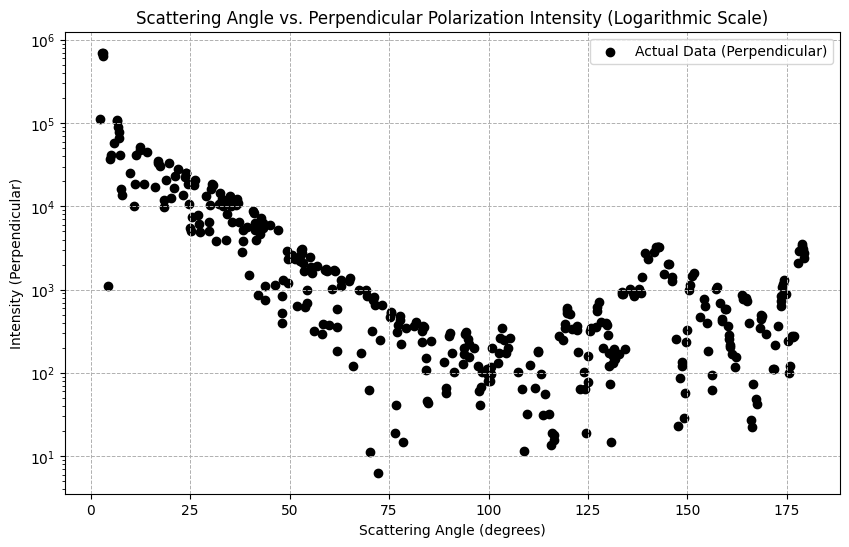

In [ ]:
import matplotlib.pyplot as plt

# Assuming X_train1, X_test1, y_train1, y_test1 are defined for parallel intensity
# Assuming X_train2, X_test2, y_train2, y_test2 are defined for perpendicular intensity

# Plotting for Parallel Intensity
plt.figure(figsize=(10, 6))
plt.scatter(X_test1, y_test1, color='black', label='Actual Data (Parallel)')
plt.xlabel('Scattering Angle (degrees)')
plt.ylabel('Intensity (Parallel)')
plt.title('Scattering Angle vs. Parallel Polarization Intensity (Logarithmic Scale)')
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

# Plotting for Perpendicular Intensity
plt.figure(figsize=(10, 6))
plt.scatter(X_test2, y_test2, color='black', label='Actual Data (Perpendicular)')
plt.xlabel('Scattering Angle (degrees)')
plt.ylabel('Intensity (Perpendicular)')
plt.title('Scattering Angle vs. Perpendicular Polarization Intensity (Logarithmic Scale)')
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()


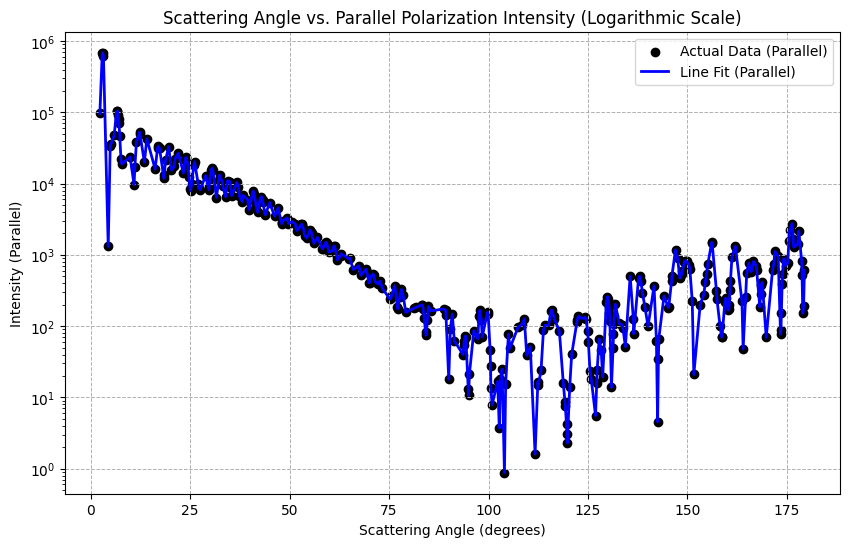

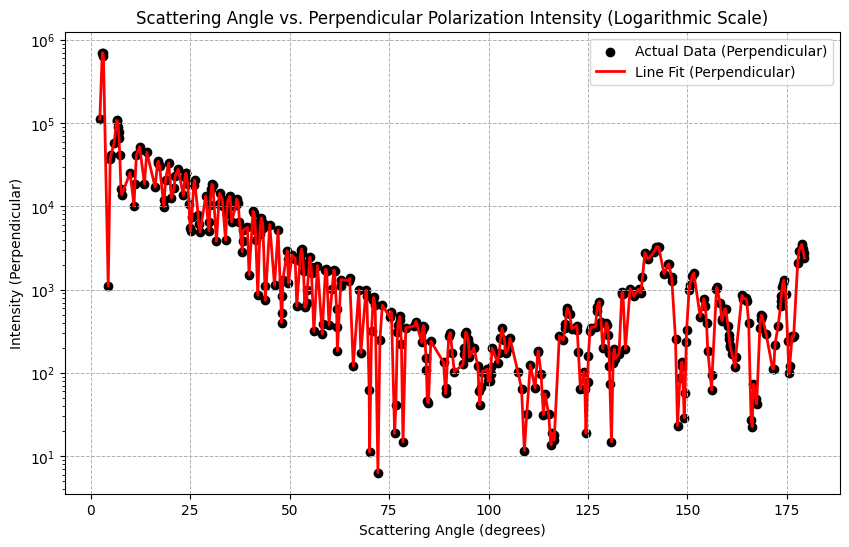

In [ ]:
import matplotlib.pyplot as plt

# Assuming X_test1, y_test1 are defined for parallel intensity
# Assuming X_test2, y_test2 are defined for perpendicular intensity

# Sort the points based on X values to ensure the line connects in order
sorted_indices1 = X_test1.squeeze().argsort()
sorted_indices2 = X_test2.squeeze().argsort()

# Plotting for Parallel Intensity
plt.figure(figsize=(10, 6))
plt.scatter(X_test1.iloc[sorted_indices1], y_test1.iloc[sorted_indices1], color='black', label='Actual Data (Parallel)')
plt.plot(X_test1.iloc[sorted_indices1], y_test1.iloc[sorted_indices1], color='blue', linestyle='-', linewidth=2, label='Line Fit (Parallel)')
plt.xlabel('Scattering Angle (degrees)')
plt.ylabel('Intensity (Parallel)')
plt.title('Scattering Angle vs. Parallel Polarization Intensity (Logarithmic Scale)')
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

# Plotting for Perpendicular Intensity
plt.figure(figsize=(10, 6))
plt.scatter(X_test2.iloc[sorted_indices2], y_test2.iloc[sorted_indices2], color='black', label='Actual Data (Perpendicular)')
plt.plot(X_test2.iloc[sorted_indices2], y_test2.iloc[sorted_indices2], color='red', linestyle='-', linewidth=2, label='Line Fit (Perpendicular)')
plt.xlabel('Scattering Angle (degrees)')
plt.ylabel('Intensity (Perpendicular)')
plt.title('Scattering Angle vs. Perpendicular Polarization Intensity (Logarithmic Scale)')
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()


In [ ]:
#Implemented Gaussian processes for regression
#As our data is not linear so we have used this gaussian process
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit the model
gp.fit(X_train1, y_train1)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=10)

In [ ]:
y_pred, sigma = gp.predict(X_test1, return_std=True)

In [ ]:
array_with_decimals = np.round(np.linspace(0, 1, 10), 6).reshape(-1, 1)
gp.predict(array_with_decimals)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


array([21766979.14434814, 21561938.26454163, 20956300.06539917,
       19977912.71252441, 18671219.87908936, 17094446.34651184,
       15316039.89727783, 13410417.7806778 , 11453610.16638184,
        9518908.48701477])

In [ ]:
from sklearn.metrics import r2_score
#In regression problem we check r2 score for accuracy.
r2 = r2_score(y_test1, y_pred)
print(f"R-squared (R2) Score: {r2*100} %")


R-squared (R2) Score: 99.99999999999999 %


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test1, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
#If you see the MSE the value is very less which is tending to zero.

Mean Squared Error (MSE): 2.1837225226018783e-07


Perpendicular

In [ ]:
#Implemented Gaussian processes for regression
#As our data is not linear so we have used this gaussian process
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit the model
gp.fit(X_train2, y_train2)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=10)

In [ ]:
y_pred, sigma = gp.predict(X_test2, return_std=True)

In [ ]:
array_with_decimals = np.round(np.linspace(0, 1, 10), 6).reshape(-1, 1)
gp.predict(array_with_decimals)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


array([21766979.14456177, 21560934.96905518, 20952381.79788208,
       19969443.38122559, 18656993.19210815, 17073798.92349243,
       15288913.15507507, 13377362.8132782 , 11415736.71464539,
        9477783.7333374 ])

In [ ]:
from sklearn.metrics import r2_score
#In regression problem we check r2 score for accuracy.
r2 = r2_score(y_test2, y_pred)
print(f"R-squared (R2) Score: {r2*100} %")


R-squared (R2) Score: 99.99999999999999 %


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test2, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
#If you see the MSE the value is very less which is tending to zero.

Mean Squared Error (MSE): 2.1882059485080903e-07


In [ ]:
data_denormal = pd.read_csv("/content/meiscatt(1).csv")
#Variables for parallel
max_value_parallel = data_denormal['Parallel'].max()
min_value_parallel = data_denormal['Parallel'].min()
#Variables for angle
max_value_angle = data_denormal['Angle theta'].max()
min_value_angle = data_denormal['Angle theta'].min()
custom_value = float(input("Enter the angel value "))
normalized_custom = (custom_value - min_value_angle)/(max_value_angle - min_value_angle)
prdicted_value =gp.predict([[normalized_custom]]) #prediction
# denormalized_value_parallel = ((prdicted_value * (max_value_parallel - min_value_parallel) + min_value_parallel))
print(f"The predicted value of parallel Light intensity is : {prdicted_value}")